# How to quickly compare the quality of six models at the same time

As for me, the models in the standard version do not classify well. This is not about having Accuracy at 95% but about classifying minority variables well. The launched data set is far unbalanced. It is enough that the models recognize all results as zero and already have a 95% accuracy because zero represents 95% of empirical results.
I used several innovative solutions here, especially loop-based solutions, for example subplots.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.ensemble import BaggingClassifier

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/1/Stroke_Prediction.csv')
print(df.shape)
print()
print(df.columns)
df.head(3)

(43400, 12)

Index(['ID', 'Gender', 'Age_In_Days', 'Hypertension', 'Heart_Disease',
       'Ever_Married', 'Type_Of_Work', 'Residence', 'Avg_Glucose', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')


,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


Zmniejszacz próbki

In [2]:
df = df.sample(frac = 1.0, random_state=10) 
df.shape

(43400, 12)

### Tool for automatic coding of discrete variables

In [3]:
a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
Gender --- object
Ever_Married --- object
Type_Of_Work --- object
Residence --- object
Smoking_Status --- object


In [4]:
df.fillna(7777, inplace=True)

In [5]:
X = df.drop('Stroke', axis=1) 
y = df['Stroke']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

In [6]:
X_test = X_test.values
y_test = y_test.values
X_train = X_train.values
y_train = y_train.values

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

NBC = GaussianNB() 
LRE = LogisticRegression(solver='lbfgs')
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
LGBM = LGBMClassifier()
CBC = CatBoostClassifier(verbose=0, n_estimators=100)


classifiers = [NBC,LRE,GBC,RFC,LGBM,CBC]


for cls in classifiers:
    cls.fit(X_train, y_train)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_learning_curves
from prettytable import PrettyTable
from simple_colors import * 

#classifiers = [NBC,LRE,GBC,RFC,LGBM,CBC]

Recall_Training = ['Recall Training: ']
Precision_Training = ['Precision Training: ']
Recall_Test= ['Recall Test: ']
Precision_Test = ['Precision Test: ']

def compute_metric2(model):

    Recall_Training = np.round(recall_score(y_train, model.predict(X_train)), decimals=3)
    Precision_Training = np.round(precision_score(y_train, model.predict(X_train)), decimals=3)
    Recall_Test = np.round(recall_score(y_test, model.predict(X_test)), decimals=3) 
    Precision_Test = np.round(precision_score(y_test, model.predict(X_test)), decimals=3)
        
    return Recall_Training, Precision_Training, Recall_Test, Precision_Test

for cls in classifiers:

    results = compute_metric2(cls)
    Recall_Training.append(results[0])
    Precision_Training.append(results[1])
    Recall_Test.append(blue(results[2],'bold'))
    Precision_Test.append((blue(results[3],'bold')))

 
t = PrettyTable(['Name', 'GN','LogReg','GradBoos','RandFor','LGBM','CatBoost'])
t.add_row(Recall_Training)
t.add_row(Precision_Training)
t.add_row(Recall_Test)
t.add_row(Precision_Test)

print(t)

+----------------------+-------+--------+----------+---------+-------+----------+
|         Name         |   GN  | LogReg | GradBoos | RandFor |  LGBM | CatBoost |
+----------------------+-------+--------+----------+---------+-------+----------+
|  Recall Training:    | 0.196 | 0.003  |  0.032   |   1.0   |  0.22 |  0.072   |
| Precision Training:  | 0.104 | 0.118  |   0.87   |   1.0   | 0.986 |  0.938   |
|    Recall Test:      | 0.217 | 0.006  |  0.006   |  0.006  | 0.019 |  0.013   |
|   Precision Test:    | 0.109 |  0.25  |   0.25   |   1.0   | 0.273 |   0.5    |
+----------------------+-------+--------+----------+---------+-------+----------+


In [9]:
#classifiers = [NBC,LRE,GBC,RFC,LGBM,CBC]
from sklearn.metrics import precision_recall_fscore_support as score

Precision_0 = ['Precision_0: ']
Precision_1 = ['Precision_1: ']
Recall_0 = ['Recall_0: ']
Recall_1 = ['Recall_1: ']
f1_score_0 = ['f1-score_0: ']
f1_score_1 = ['f1-score_1: ']
Support_0 = ['Support_0: ']
Support_1 = ['Support_1: ']


def compute_metric4(model):

    precision, recall, fscore, support = score(y_test, model.predict(X_test))
    
    Precision_0 = np.round(precision[:1],decimals=3).item()
    Precision_1 = np.round(precision[1:],decimals=3).item()
    Recall_0 = np.round(recall[:1],decimals=3).item()
    Recall_1 = np.round(recall[1:],decimals=3).item()
    f1_score_0 = np.round(fscore[:1],decimals=3).item()
    f1_score_1 = np.round(fscore[1:],decimals=3).item()
    Support_0 = np.round(support[:1],decimals=3).item()
    Support_1 = np.round(support[1:],decimals=3).item()
        
    return Precision_0, Precision_1, Recall_0, Recall_1, f1_score_0, f1_score_1, Support_0, Support_1

for cls in classifiers:

    results = compute_metric4(cls)
    Precision_0.append(results[0])
    Precision_1.append(blue(results[1],'bold'))
    Recall_0.append(results[2])
    Recall_1.append(blue(results[3],'bold'))
    f1_score_0.append(results[4])
    f1_score_1.append(blue(results[5],'bold'))
    Support_0.append(results[6])
    Support_1.append(blue(results[7],'bold'))
         

t = PrettyTable(['Name', 'GN','LogReg','GradBoos','RandFor','LGBM','CatBoost'])
t.add_row(Precision_0)
t.add_row(Precision_1)
t.add_row(Recall_0)
t.add_row(Recall_1)
t.add_row(f1_score_0)
t.add_row(f1_score_1)
t.add_row(Support_0)
t.add_row(Support_1)


print(t)

+---------------+-------+--------+----------+---------+-------+----------+
|      Name     |   GN  | LogReg | GradBoos | RandFor |  LGBM | CatBoost |
+---------------+-------+--------+----------+---------+-------+----------+
| Precision_0:  | 0.985 | 0.982  |  0.982   |  0.982  | 0.982 |  0.982   |
| Precision_1:  | 0.109 |  0.25  |   0.25   |   1.0   | 0.273 |   0.5    |
|   Recall_0:   | 0.967 |  1.0   |   1.0    |   1.0   | 0.999 |   1.0    |
|   Recall_1:   | 0.217 | 0.006  |  0.006   |  0.006  | 0.019 |  0.013   |
|  f1-score_0:  | 0.976 | 0.991  |  0.991   |  0.991  | 0.991 |  0.991   |
|  f1-score_1:  | 0.145 | 0.012  |  0.012   |  0.013  | 0.036 |  0.025   |
|  Support_0:   |  8523 |  8523  |   8523   |   8523  |  8523 |   8523   |
|  Support_1:   |  157  |  157   |   157    |   157   |  157  |   157    |
+---------------+-------+--------+----------+---------+-------+----------+


In [10]:
#classifiers = [NBC,LRE,GBC,RFC,LGBM,CBC]
AUC_train = ['AUC_train: ']
AUC_test = ['AUC_test: ']

def compute_metric(model):

    auc_train = np.round(metrics.roc_auc_score(y_train,model.predict_proba(X_train)[:,1]),decimals=3)
    auc_test = np.round(metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1]),decimals=3)

    return auc_train, auc_test

for cls in classifiers:

    results = compute_metric(cls)
    AUC_train.append(results[0])
    AUC_test.append(results[1])


t = PrettyTable(['Name', 'GN','LogReg','GradBoos','RandFor','LGBM','CatBoost'])
t.add_row(AUC_train)
t.add_row(AUC_test)

print(t)

+-------------+-------+--------+----------+---------+-------+----------+
|     Name    |   GN  | LogReg | GradBoos | RandFor |  LGBM | CatBoost |
+-------------+-------+--------+----------+---------+-------+----------+
| AUC_train:  | 0.849 | 0.662  |  0.901   |   1.0   |  0.99 |   0.92   |
|  AUC_test:  | 0.853 | 0.627  |  0.862   |  0.796  | 0.844 |  0.852   |
+-------------+-------+--------+----------+---------+-------+----------+


In [11]:
#classifiers = [NBC,LRE,GBC,RFC,LGBM,CBC]
Accuracy_Training = ['Accuracy_Training: ']
Accuracy_Test = ['Accuracy_Test: ']

def compute_metric5(model):

    Accuracy_Training = np.round(accuracy_score(y_train, model.predict(X_train)), decimals=3)
    Accuracy_Test = np.round(accuracy_score(y_test, model.predict(X_test)), decimals=3)

    return  Accuracy_Training, Accuracy_Test

for cls in classifiers:

    results = compute_metric5(cls)
    Accuracy_Training.append(results[0])
    Accuracy_Test.append(results[1])


t = PrettyTable(['Name', 'GN','LogReg','GradBoos','RandFor','LGBM','CatBoost'])
t.add_row(Accuracy_Training)
t.add_row(Accuracy_Test)

print(t)

+---------------------+-------+--------+----------+---------+-------+----------+
|         Name        |   GN  | LogReg | GradBoos | RandFor |  LGBM | CatBoost |
+---------------------+-------+--------+----------+---------+-------+----------+
| Accuracy_Training:  | 0.955 | 0.982  |  0.982   |   1.0   | 0.986 |  0.983   |
|   Accuracy_Test:    | 0.954 | 0.982  |  0.982   |  0.982  | 0.981 |  0.982   |
+---------------------+-------+--------+----------+---------+-------+----------+


In [12]:
classifiers = [NBC,LRE,GBC,RFC,LGBM,CBC]
f1_score_macro = ['f1_score_macro:  ']
f1_score_micro = ['f1_score_micro: ']

def compute_metric6(model):

    f1_score_macro = np.round(metrics.f1_score(y_test, model.predict(X_test), average='macro'), decimals=3)
    f1_score_micro = np.round(metrics.f1_score(y_test, model.predict(X_test), average='micro'), decimals=3)

    return  f1_score_macro, f1_score_micro

for cls in classifiers:

    results = compute_metric6(cls)
    f1_score_macro.append(results[0])
    f1_score_micro.append(results[1])


t = PrettyTable(['Name', 'GN','LogReg','GradBoos','RandFor','LGBM','CatBoost'])
t.add_row(f1_score_macro)
t.add_row(f1_score_micro)

print(t)

+-------------------+-------+--------+----------+---------+-------+----------+
|        Name       |   GN  | LogReg | GradBoos | RandFor |  LGBM | CatBoost |
+-------------------+-------+--------+----------+---------+-------+----------+
| f1_score_macro:   | 0.561 | 0.502  |  0.502   |  0.502  | 0.513 |  0.508   |
|  f1_score_micro:  | 0.954 | 0.982  |  0.982   |  0.982  | 0.981 |  0.982   |
+-------------------+-------+--------+----------+---------+-------+----------+


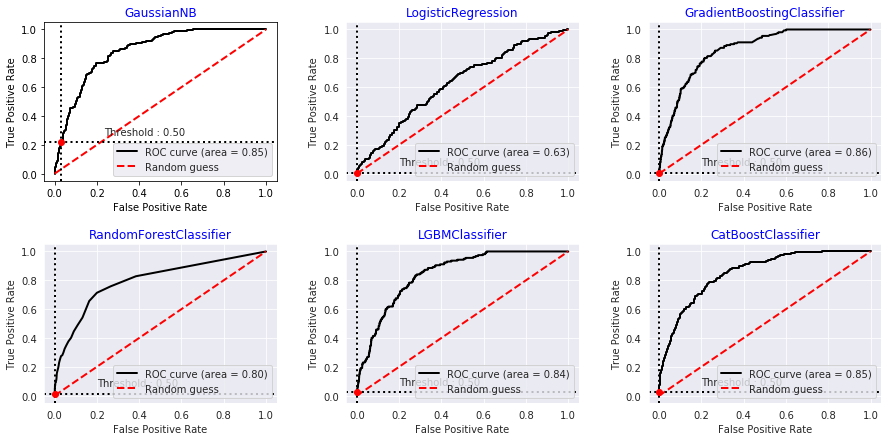

In [13]:
classifiers = [NBC,LRE,GBC,RFC,LGBM,CBC]

from plot_metric.functions import BinaryClassification

plt.figure(figsize=(15,7))
grid = plt.GridSpec(2, 3, wspace=0.3, hspace=0.4)

for i in range(6):
    col, row = i%3,i//3
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_color('blue')
    
    model = classifiers[i]
    bc = BinaryClassification(y_test, model.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])
    bc.plot_roc_curve(title=type(classifiers[i]).__name__)

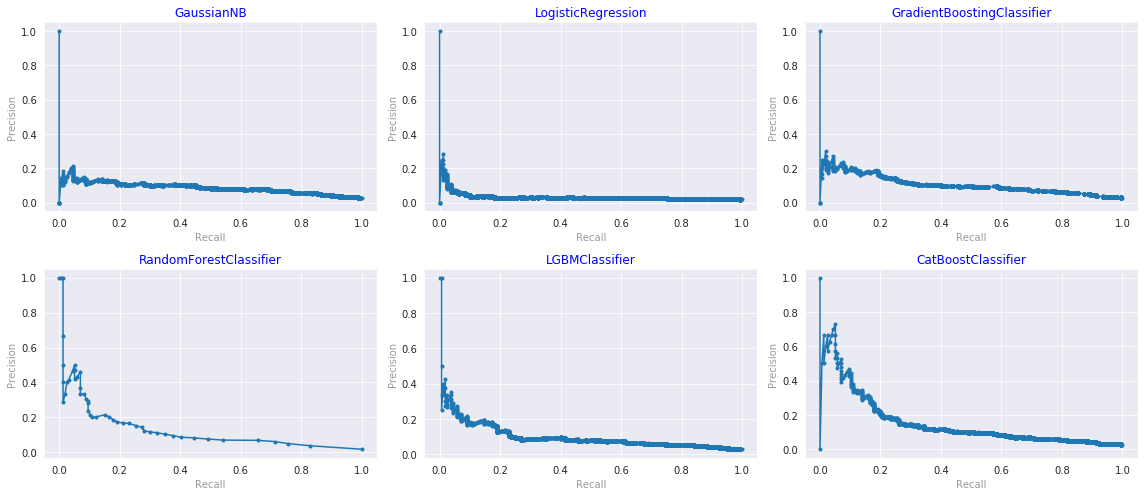

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,7))

for cls, ax in zip(classifiers, axes.flatten()):
    precision, recall, thresholds = precision_recall_curve(y_test, cls.predict_proba(X_test)[:,1])
    ax.plot(recall, precision, marker='.', label='model')
    ax.title.set_text(type(cls).__name__)
    ax.title.set_color('blue')
    ax.set_xlabel('Recall', color='grey', alpha=0.8)
    ax.set_ylabel('Precision', color='grey', alpha=0.8)
 
plt.tight_layout()
plt.show()

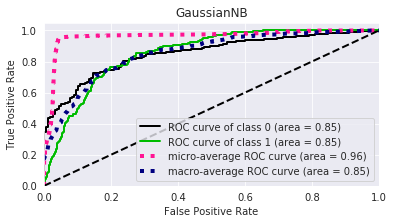

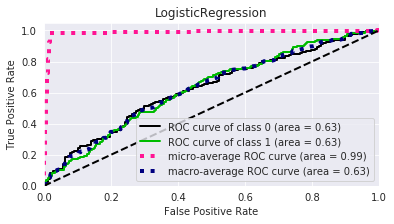

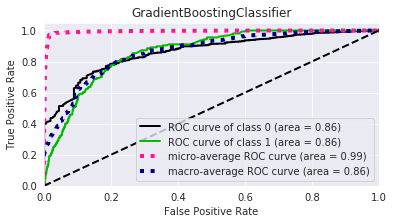

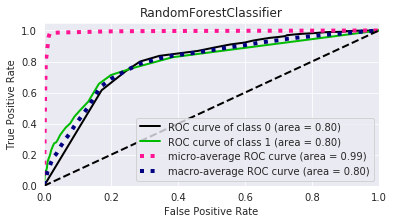

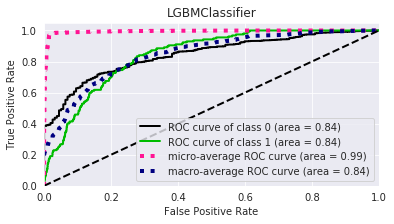

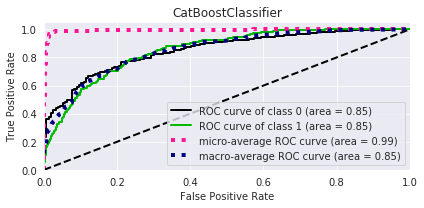

In [16]:
import scikitplot as skplt

for cls, ax in zip(classifiers, axes.flatten()):
    skplt.metrics.plot_roc(y_test, cls.predict_proba(X_test),figsize=(6, 3),title=type(cls).__name__)
    
plt.tight_layout()  
plt.show()

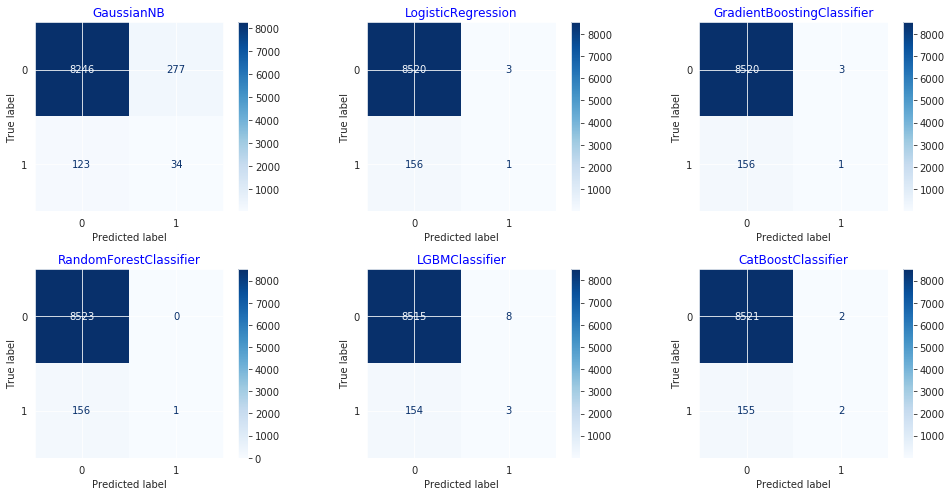

In [17]:
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,7))
target_names = ['0','1']


for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=target_names,values_format='')
    ax.title.set_text(type(cls).__name__)
    ax.title.set_color('blue')
    
plt.tight_layout()  
plt.show()

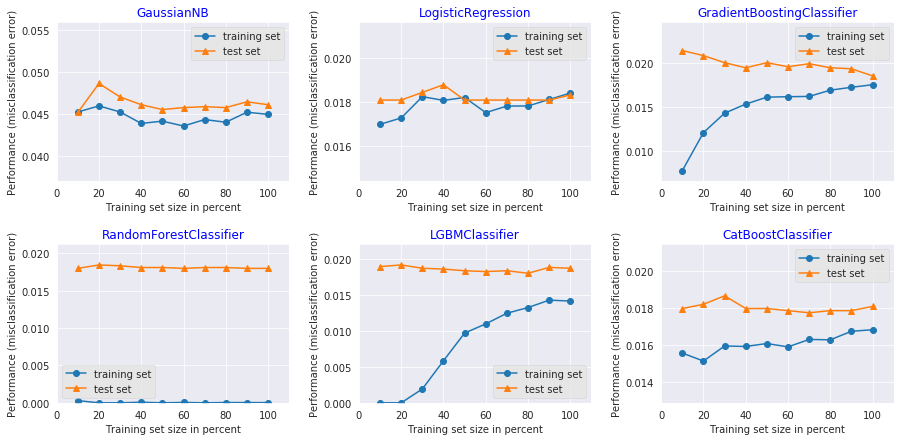

In [21]:
classifiers = [NBC,LRE,GBC,RFC,LGBM,CBC]
plt.figure(figsize=(15,7))

grid = plt.GridSpec(2, 3, wspace=0.3, hspace=0.4)

for i in range(6):
    col, row = i%3,i//3
    ax = plt.subplot(grid[row,col]) 
    ax.title.set_text(type(classifiers[i]).__name__)
    ax.title.set_color('blue')
    
    model = classifiers[i]
    plot_learning_curves(X_train, y_train, 
                         X_test, y_test, 
                         model, print_model=False, style='ggplot')
